![title](../Analyzer_Package/datafiles/cms.png)
    <p style="margin-right:5%; margin-left:5%; font-size:22px; font-weight: 200; line-height: 1.2em">

<p style="margin-right:8%; margin-left:8%; font-size:28px; font-weight: 200; line-height: 1.5em">
**First Part: How to do an Analysis in Particle Physics?**

## Example 1: Muon Identification
This example is divided in two parts: 

* Learn how to do an analysis based on a tree of events
* Stablish a good selection criteria

(All code you are going to need is provided in Analyzer_Package, so you can access it as many times as you need and check in it your questions.)    

Let's start with the analysis of the tree!

In this context, a tree is a set of arrranged events created from...(patuples in web..)...with createTTree.py and exeCreateTTree.py scripts. This dataset is a simplified version of the original data and we call it **mytree.root**. The collection reach miles of events with one or more particles in each one. So, to read and manage such amount of data you need a spezializate software. In this first step, you must look at **Analyzer_All.py** script. This code read each event of the tree and fill a number of histograms. Each event knows how many particles were created and for each one, which are the value of their kinematics variables, so, the result of Analyzer_All.py is a set of histograms that contain valuable statistic information about each kinematic variable for all particles produced a long of all events. The aim of this exercise is to isolate the muons that proceed from Z->mumu decays and stablish a good selection criteria. For that, you must plot different histograms and get some conclusions needed in the following parts.  

**NOTE:** 

For each exercise, to run the code is necessary import **ROOT**.


In [4]:
# Import ROOT
import ROOT

In [2]:
cd ../Analyzer_Package/

/home/jupyter/CmsOpenData/Analyzer_Package


* ### Run the Analysis
<p style="margin-right:0%; margin-left:0%; font-size:14px; font-weight: 200; line-height: 1.2em">
Perform the analysis, running the module **Analyzer_All.py** and  obtain a root file: **histos.root** stored in **datafiles** folder that contains the histograms for all muons. Each histogram is saved with a name started by *h_* followed by the *name of the kinematic variable*.

In [27]:
# Import the Analyzer module that performs the readinf of all events from the tree
from Analyzer_All import Analyzer

# Call to the analysis and create the root file for histograms
analysis=Analyzer()
analysis.process()

The histograms for all muons are saved in datafiles/histos.root


* ### Check your h_histogram
<p style="margin-right:0%; margin-left:0%; font-size:14px; font-weight: 200; line-height: 1.2em">
Open the histos.root file for reading and printing the list of histograms saved in it.

In [3]:
# Get the root file that contains the histograms for all muons: histos.root.
Hfile=ROOT.TFile("datafiles/histos.root", "read")
# List the histograms in the file
Hfile.ls()

TFile**		datafiles/histos.root	
 TFile*		datafiles/histos.root	
  KEY: TH1F	h_pt;1	Muons Transverse Momentun
  KEY: TH1F	h_px;1	Muons x- Momentun
  KEY: TH1F	h_py;1	Muons y- Momentun
  KEY: TH1F	h_pz;1	Muons z- Momentun
  KEY: TH1F	h_eta;1	Angle Transvese
  KEY: TH1F	h_energy;1	Muons Energy
  KEY: TH1F	h_distance;1	Distance from Primary vertex Z 
  KEY: TH1F	h_charge;1	Muons Charge
  KEY: TH1F	h_normChi2;1	Muons Chi2
  KEY: TH1F	h_numberOfValidHits;1	Number of Valid Hits
  KEY: TH1F	h_dB;1	Impact Parameter
  KEY: TH1F	h_isolation_sumPt;1	IsolationX
  KEY: TH1F	h_isolation_emEt;1	IsolationX
  KEY: TH1F	h_isolation_hadEt;1	IsolationX
  KEY: TH1F	h_mass;1	Inv_mass


* ### Learn the kinematic variables
<p style="margin-right:0%; margin-left:0%; font-size:14px; font-weight: 200; line-height: 1.2em">
Here you have a set of varibles and the name used to save their histogram:

             - momentum trensverse pt :                               'h_pt'
             - momentum X-coordinate px:                              'h_px'
             - momentum Y-coordinate py:                              'h_py'
             - momentum Z-coordinate pz:                              'h_pz' 
             - angle transverse eta :                                 'h_eta'
             - energy :                                               'h_energy'
             - charge :                                               'h_charge'
             - distance between particle Z-coord and Primary Vertex : 'h_distance'
             - impact paremeter dB:                                   'h_dB'
             - isolation:                                             'h_isolation'
             - invariant mass:                                        'h_mass'
             - normalize Chi2 normChi2:                               'h_normChi2'
             - numValidHits :                                         'h_numberOfValidHits'
             

                

* ### Draw Histos
<p style="margin-right:0%; margin-left:0%; font-size:14px; font-weight: 200; line-height: 1.2em">
Once you have that file,  the next step is to plot the histogram. Here, we detail some procedures  

* #### First method: 

<p style="margin-right:0%; margin-left:0%; font-size:15px; font-weight: 200; line-height: 1.2em">
**1.**         Create a ROOT  canvas and draw the histogram on it. 

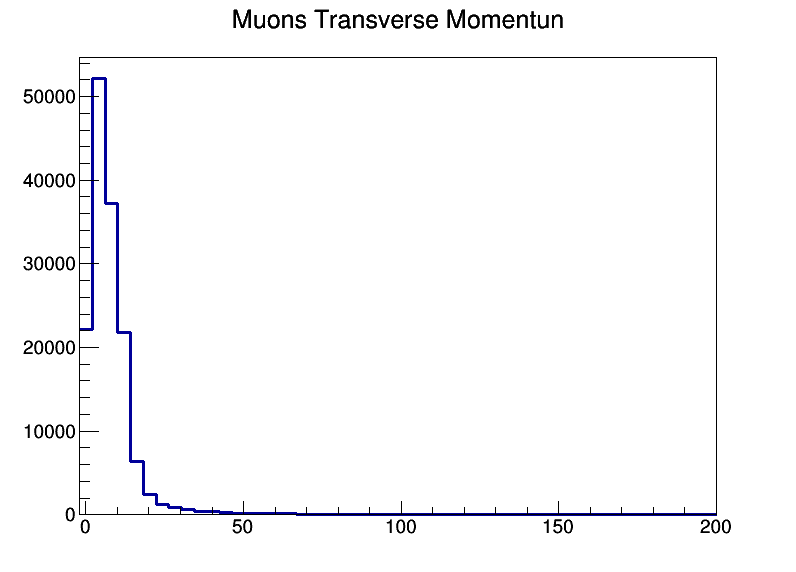

In [4]:
### Get the root file that contains the histograms for all muons: histos.root.
Hfile=ROOT.TFile("datafiles/histos.root", "read")

### You must create a variable to store the histogram selected.
histo1=Hfile.Get('h_pt')

### First: Create the canvas where the histogram is going to be drawn
canvas = ROOT.TCanvas("myCanvas","All muons: NormChi2",800,600)

### Second: Draw the histogram
histo1.Draw()

### Third : Draw the canvas
canvas.Draw()


**2.** Set your favorite configuration. 

Once you have created the variable where the histogram is stored, and after drawing it, you can set the histogram and the canvas for a better customization. 

References:

[Tcolor Class](https://root.cern.ch/doc/master/classTColor.html)

[Histogram Customization](https://root.cern.ch/doc/v606/classTHistPainter.html)

[Marker Atributtes such as color, size or style for histograms](https://root.cern.ch/doc/master/classTAttMarker.html)

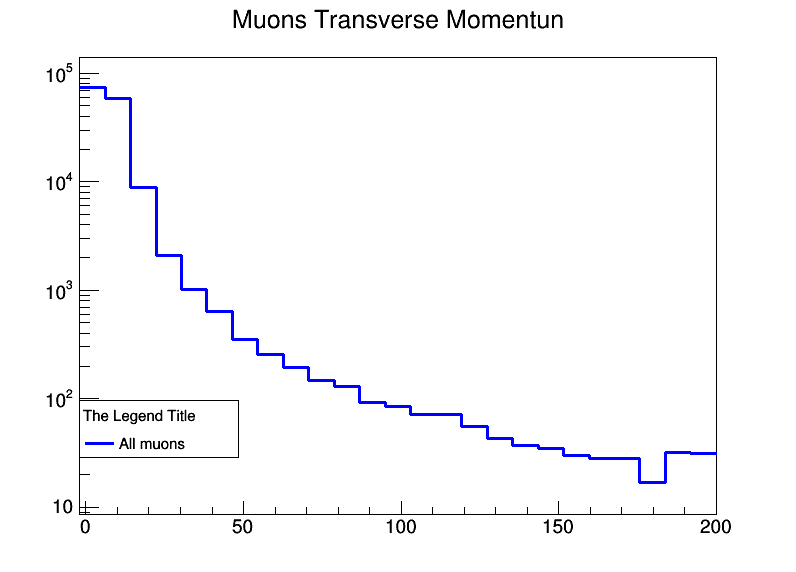

In [5]:
### Change the line color
histo1.SetLineColor(4)

### Change the bounds of the histograms for X Axis 
histo1.GetXaxis().SetRangeUser(40, 120);

### Change the bins for the histograms by diving by a divisor of the initial number of bins. 
## Note: To restore the binning you must to draw the histo again.
histo1.Rebin(2)

### Create the legend. TLegend(x1, y1, x2, y2)
legend =ROOT.TLegend(0.1,0.2,0.30,0.3);
legend.SetHeader("The Legend Title");
legend.AddEntry(histo1,"All muons","l");
#legend->AddEntry("gr","Graph with error bars","lep");
legend.Draw();

### Twist linear scale for Y axe to the logaritmic one with the function SetLogy.
canvas.SetLogy()

### Draw the histogram again and check your changes 
canvas.Draw()

**3.**         Save the image in a .png file. 

The previous procedure does not save the image automatically, it just shows you the picture. This statement can be written before or after stablish your favorite setting. Hence, you can collect both histograms for the analysis. 

In [6]:
# If you want keep it, you must type: 
# NOTE: Write the name of the file 

name = "pt"
canvas.SaveAs("../output_histograms/"+ name +".png")

# This save the image as a .png file.

Info in <TCanvas::Print>: png file ../output_histograms/pt.png has been created


** 4.1.** And set again your preferences. ** PAY ATTENTION :** some settings are applied on the histo variable some others on the canvas.  

* ### Second method: 

**1.** Import **Histos module** and draw the histograms directly.

Histos module correspond to the Histos.py script that has been designed to draw, customize and save the histograms in a easier way. At this moment, our purpose is to plot different 'h_variable' histogram and configure their visual parameters, so all you need is a function named **DrawHi(  )** and a funtion named ** Setting(  )** respectively. All the histograms are automatically saved in the main folder: **output_histograms**.  

**DrawHi(  ) accepts as many parameters as you want, but you have just two conditions:**

* You must type between quotes the correct name of the histogram you want to plot in one canvas i.e 'h_pt'
* You must type in a tuple and between quotes the name of the different histograms you want to draw in the same canvas i.e ('h_pt', 'h_distance','h_eta')



In [16]:
from Histos import Histos

histo = Histos()

histo.DrawHi('h_pt', 'h_mass')

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: 


ReferenceError: attempt to access a null-pointer

[IPKernelApp] ERROR | No such comm target registered: ipython.widget
[IPKernelApp] ERROR | No such comm target registered: ipython.widget
[IPKernelApp] ERROR | No such comm target registered: ipython.widget
[IPKernelApp] ERROR | No such comm target registered: ipython.widget
Error in <TFile::TFile>: file datafiles/histos.root does not exist
Error in <TFile::TFile>: file datafiles/goodHistos.root does not exist


** Setting(  ) set some changes to get better information. The name of the histogram you want to modify and the name with one you want to store the current versions are mandatory.**

<p style="margin-right:0%; margin-left:0%; font-size:16px; font-weight: 200; line-height: 1.2em">

* Set the scale typing: scale = LogY or scale = LogX
* Set the binning typing : nbin = #
* Set the limits in x axis typing : xlimits = (xmin, xmax)
* Set the legend typing : legend = True


TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: 


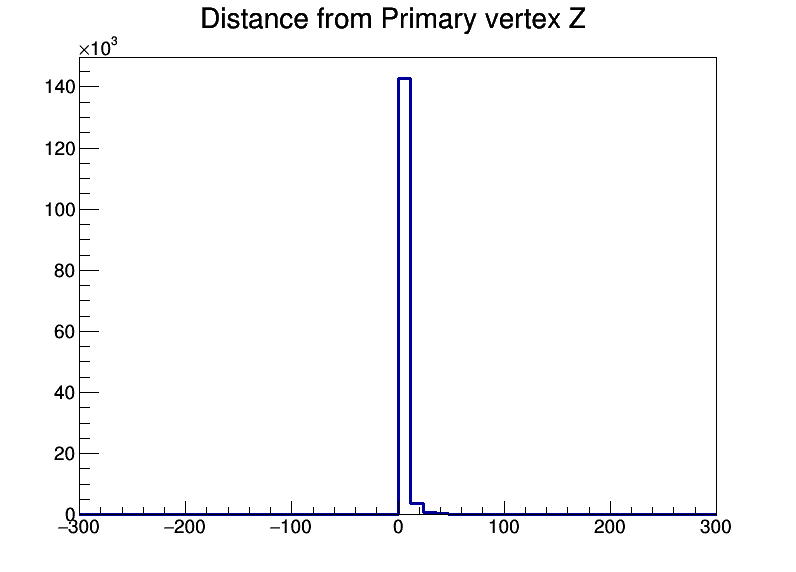

<ROOT.TH1F object ("h_distance") at 0x50b6880>


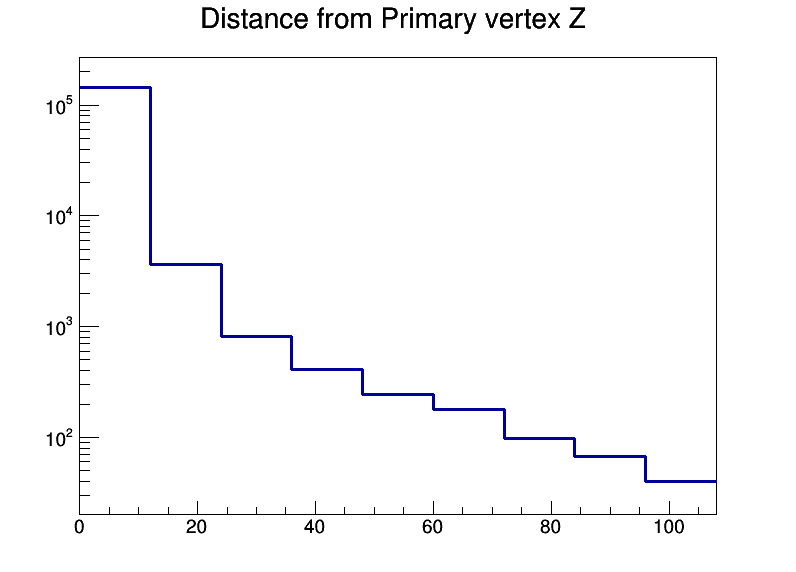

Info in <TCanvas::Print>: png file ../output_histograms/namess.png has been created
Info in <TCanvas::Print>: png file ../output_histograms/distance_changed.png has been created


In [10]:
f= Histos()
#histogram = f.DrawHi('g_mass')
f.Setting('distance_changed', 'h_distance', scale = 'LogY', nbin = 2, xlimits = (0,100), legend = True )

In [11]:
j=Histos()


TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: 


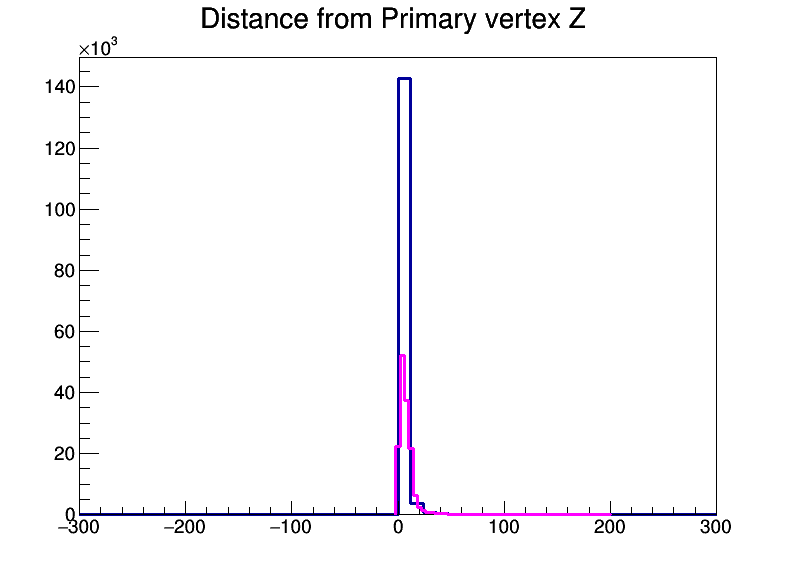

(<ROOT.TH1F object ("h_distance") at 0x5098260>, <ROOT.TH1F object ("h_pt") at 0x50c0860>)
<ROOT.TH1F object ("h_distance") at 0x5098260>
<ROOT.TH1F object ("h_pt") at 0x50c0860>


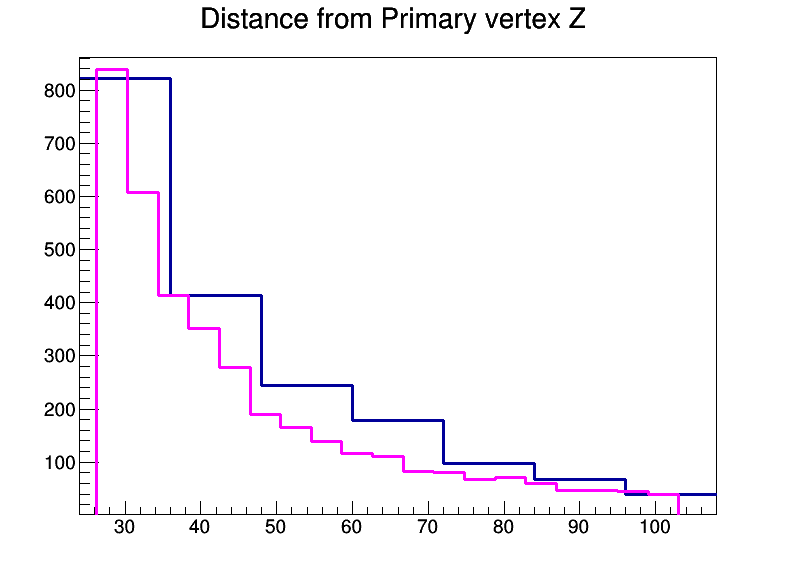

Info in <TCanvas::Print>: png file ../output_histograms/namess.png has been created
Info in <TCanvas::Print>: png file ../output_histograms/probe.png has been created


In [12]:
j.Setting('probe',('h_distance','h_pt'), xlimits = (30,100))

### Once the histogram is saved in the folder, you can draw it
After do it, go to the folder that contains the histograms

In [13]:
cd ../output_histograms

/home/jupyter/CmsOpenData/output_histograms


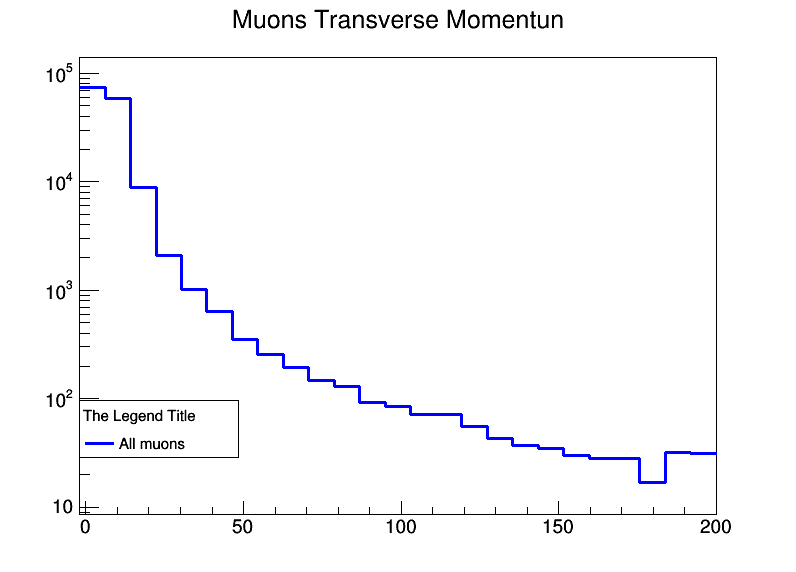

In [15]:
from IPython.display import Image
Image(filename= "pt.png")